In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import math



In [9]:
import matplotlib.pyplot as plt

# Increase the figure size

sns.set(rc={'figure.figsize':(15,20)})
sns.set_context("poster", font_scale = 5)
sns.set_style("white")




# Increase the line width
plt.rcParams['lines.linewidth'] = 1.5

# Increase the marker size
plt.rcParams['lines.markersize'] = 12

# Increase the size of tick labels
plt.rcParams['xtick.labelsize'] = 60
plt.rcParams['ytick.labelsize'] = 60

# Increase the spacing between subplots
plt.subplots_adjust(hspace=0.2)

# Use a white background with black grid lines
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['grid.color'] = 'black'


# Use a serif font for better readability
plt.rcParams['font.family'] = 'arial'

# Set the output file format and resolution for saving the figure
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.format'] = 'pdf'

<Figure size 1500x2000 with 0 Axes>

## 24 cseppes

In [10]:
df24csepp = pd.read_csv('24drops_growthdata.csv', delimiter = ';')
df24csepp.head(5)

,Label,Area,XM,YM,Width,Height,Circ.,AR,Round,Area_mm2,Days,Plate_location,Drop_size_init,Cell_num_init,Plate,XM_corr,YM_corr,Voronoi_area,Place,Column
0,s11013.jpg_a-1.tif,2019,434.54,227.18,51,52,0.88,1.01,0.99,36.309018,1,D6,5,8000,S1,357.16,0.00,18749,Corner,D
1,s11013.jpg_a-1.tif,1684,434.48,363.93,48,46,0.91,1.03,0.97,30.284491,1,D5,4,8000,S1,357.10,136.75,21534,Edge,D
2,s11013.jpg_a-1.tif,1329,437.67,503.99,42,42,0.90,1.02,0.98,23.900290,1,D4,3,8000,S1,360.29,276.81,21147,Edge,D
3,s11013.jpg_a-1.tif,1264,319.58,508.59,41,40,0.88,1.03,0.97,22.731352,1,C4,3,4000,S1,242.20,281.41,16934,Mid,C
4,s11013.jpg_a-1.tif,947,438.36,644.11,36,35,0.89,1.03,0.97,17.030530,1,D3,2,8000,S1,360.98,416.93,21704,Edge,D


In [11]:
df24sim = pd.read_csv('data24_simul.csv')
df24sim.head(5)
headers = list(df24sim.columns)

headers.pop(0)

print(headers)
df24simul_jav = df24sim.melt(id_vars='Hour', value_vars =headers, var_name ='Conditions', value_name ='Area')
df24simul_jav['Days'] = df24simul_jav['Hour'] / 24
df24simul_jav['Area_mm2'] = df24simul_jav['Area'] / 55.6
print(df24simul_jav)


['s5 c1000', 's5 c2000', 's5 c4000', 's5 c8000', 's4 c1000', 's4 c2000', 's4 c4000', 's4 c8000', 's3 c1000', 's3 c2000', 's3 c4000', 's3 c8000', 's2 c1000', 's2 c2000', 's2 c4000', 's2 c8000', 's1 c1000', 's1 c2000', 's1 c4000', 's1 c8000', 's0.5 c1000', 's0.5 c2000', 's0.5 c4000', 's0.5 c8000']
      Hour  Conditions  Area       Days   Area_mm2
0        0    s5 c1000    96   0.000000   1.726619
1        1    s5 c1000   138   0.041667   2.482014
2        2    s5 c1000   159   0.083333   2.859712
3        3    s5 c1000   240   0.125000   4.316547
4        4    s5 c1000   263   0.166667   4.730216
...    ...         ...   ...        ...        ...
6931   284  s0.5 c8000  5501  11.833333  98.938849
6932   285  s0.5 c8000  5509  11.875000  99.082734
6933   286  s0.5 c8000  5515  11.916667  99.190647
6934   287  s0.5 c8000  5522  11.958333  99.316547
6935   288  s0.5 c8000  5534  12.000000  99.532374

[6936 rows x 5 columns]


In [12]:
df24simul_jav[['Drop size','Cell_count']] = df24simul_jav['Conditions'].str.split(" ", 1, expand=True)
cellcountmap = {'c1000': 'A', 'c2000': 'B','c4000': 'C', 'c8000': 'D'}
dropsizemap = {'s0.5': '1', 's1': '2','s2': '3', 's3': '4','s4': '5', 's5': '6'}
df24simul_jav= df24simul_jav.assign(Location=lambda x: x['Cell_count'].replace(cellcountmap) + x['Drop size'].replace(dropsizemap))



locations2 = np.unique(df24simul_jav['Location'])







C:\Users\Tünde\AppData\Local\Temp\ipykernel_22552\2927539239.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df24simul_jav[['Drop size','Cell_count']] = df24simul_jav['Conditions'].str.split(" ", 1, expand=True)


24


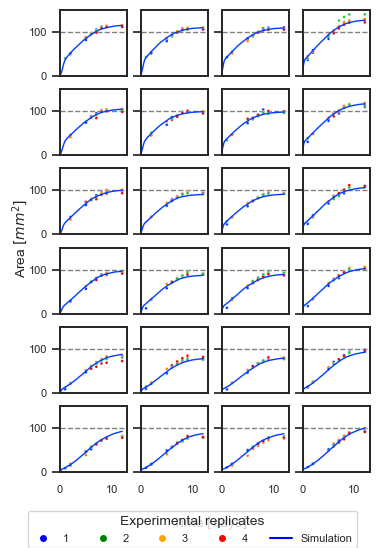

In [18]:
# figure in the paper

sns.set_context("paper", font_scale = 6)
sns.set(rc={'figure.figsize':(4,6)})
sns.set_style('white')
sns.set_palette('bright')

# Increase the line width
plt.rcParams['lines.linewidth'] = 1.5

# Increase the marker size
plt.rcParams['lines.markersize'] = 2

# Increase the size of tick labels
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

colors=[ 'blue','green','orange', 'red']
#sns.lineplot(x = dftemp['Days'], y = dftemp['Area'], data = dftemp, ax=axes[0,0])
locations = np.unique(df24simul_jav['Location'])
plates = np.unique(df24csepp['Plate'])
print(locations.size)

legend_labels = [1,2,3,4,'Simulation']
legend_handles = [
    plt.Line2D([0], [0], marker='o', color=colors[0], linestyle='None', label=legend_labels[0], markerfacecolor=colors[0], markersize=4),
    plt.Line2D([0], [0], marker='o', color=colors[1], linestyle='None', label=legend_labels[1], markerfacecolor=colors[1], markersize=4),
    plt.Line2D([0], [0], marker='o', color=colors[2], linestyle='None', label=legend_labels[2], markerfacecolor=colors[2], markersize=4),
    plt.Line2D([0], [0], marker='o', color=colors[3], linestyle='None', label=legend_labels[3], markerfacecolor=colors[3], markersize=4),
    plt.Line2D([0], [0], marker=None, color=colors[0], linestyle='-', label=legend_labels[4], markerfacecolor=colors[0], markersize=4)
]


fig3, axes3 = plt.subplots(6, 4, sharex=True, sharey=True)
fig3.supxlabel('Time $[$days$]$', fontsize=10)
fig3.supylabel('Area $[mm^2]$',  fontsize=10, x=0)
fig3.legend(handles=legend_handles, labels=legend_labels, title='Experimental replicates', loc="outside lower center",  borderaxespad=0 , ncol = 5, title_fontsize=10, fontsize=8)





# only the original layout
Splate_filter =["S1","S2","S3","S4"]

df2 = df24csepp[df24csepp.Plate.isin(Splate_filter)]
                      
for i in range(locations.size):
   
    dftemp = df2.loc[df2['Plate_location'] == locations[i]]
    dftemp2 = df24simul_jav.loc[df24simul_jav['Location'] == locations2[i]]
    sor = 5 - i%6
    oszlop = math.floor(i/6) 
    g = sns.scatterplot(x = dftemp['Days'], y = dftemp['Area_mm2'], data = dftemp, hue=dftemp['Plate'], ax=axes3[sor,oszlop], legend = None, label=None)

    axes3[sor,oszlop].set_ylim(0,150)
    plt.xlim(0,13)
    ax0 = axes3[sor,oszlop]
    ax1 = axes3[sor,oszlop].twinx()
    
    sns.lineplot(x = dftemp2['Days'], y = dftemp2['Area_mm2'], data = dftemp2,  ax=ax1, linewidth=1,legend = None, label=None)
    
    ax1.set_ylim(0,150)

    ax1.get_yaxis().set_visible(False)


for ax in axes3.flat:
    
    ax.axhline(y=100, xmin=0, xmax=13, c="gray", linewidth=1, zorder=0, linestyle='--')
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    
    


plt.savefig('growthfit24drops.svg', format = 'svg', dpi=300)
plt.savefig('growthfit24drops.png', format = 'png', dpi=300)